# Importing necessary modules

In [336]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

### Reading the csv file

In [337]:
df=pd.read_csv(r'C:\Users\mrama\Downloads\hypertension_dataset.csv')

In [338]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,Normal,6.4,25.8,NaN,Yes,Low,Non-Smoker,Yes
1,32,11.7,10,Normal,5.4,23.4,NaN,No,Low,Non-Smoker,No
2,78,9.5,3,Normal,7.1,18.7,NaN,No,Moderate,Non-Smoker,No
3,38,10.0,10,Hypertension,4.2,22.1,ACE Inhibitor,No,Low,Non-Smoker,Yes
4,41,9.8,1,Prehypertension,5.8,16.2,Other,No,Moderate,Non-Smoker,No


In [339]:
df.describe()

,Age,Salt_Intake,Stress_Score,Sleep_Duration,BMI
count,1985.000000,1985.000000,1985.000000,1985.000000,1985.000000
mean,50.341058,8.531688,4.979345,6.452242,26.015315
std,19.442042,1.994907,3.142303,1.542207,4.512857
min,18.000000,2.500000,0.000000,1.500000,11.900000
25%,34.000000,7.200000,2.000000,5.400000,23.000000
50%,50.000000,8.500000,5.000000,6.500000,25.900000
75%,67.000000,9.900000,8.000000,7.500000,29.100000
max,84.000000,16.400000,10.000000,11.400000,41.900000


In [340]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1985 non-null   int64  
 1   Salt_Intake       1985 non-null   float64
 2   Stress_Score      1985 non-null   int64  
 3   BP_History        1985 non-null   object 
 4   Sleep_Duration    1985 non-null   float64
 5   BMI               1985 non-null   float64
 6   Medication        1186 non-null   object 
 7   Family_History    1985 non-null   object 
 8   Exercise_Level    1985 non-null   object 
 9   Smoking_Status    1985 non-null   object 
 10  Has_Hypertension  1985 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 170.7+ KB


### Checking for any missing values

In [341]:
df.isnull().sum()

Age                   0
Salt_Intake           0
Stress_Score          0
BP_History            0
Sleep_Duration        0
BMI                   0
Medication          799
Family_History        0
Exercise_Level        0
Smoking_Status        0
Has_Hypertension      0
dtype: int64

### Encoading the categorical columns

In [342]:
# Label Encoding
le = LabelEncoder()
df['Medication'] = le.fit_transform(df['Medication'])
df['Has_Hypertension'] = le.fit_transform(df['Has_Hypertension'])

In [343]:
df["BP_History"].unique()

array(['Normal', 'Hypertension', 'Prehypertension'], dtype=object)

In [344]:
# Mapping
typ={'Normal':1,'Prehypertension':2,'Hypertension':3}
df.loc[:, "BP_History"] = df["BP_History"].map(typ)
df.loc[:,"Family_History"]=df["Family_History"].map({"Yes":1,"No":0})
df.loc[:,"Exercise_Level"]=df["Exercise_Level"].map({"Low":1,"Moderate":2,"High":3})
df.loc[:,"Smoking_Status"]=df["Smoking_Status"].map({"Smoker":1,"Non-Smoker":0})


In [345]:
df.head()

,Age,Salt_Intake,Stress_Score,BP_History,Sleep_Duration,BMI,Medication,Family_History,Exercise_Level,Smoking_Status,Has_Hypertension
0,69,8.0,9,1,6.4,25.8,4,1,1,0,1
1,32,11.7,10,1,5.4,23.4,4,0,1,0,0
2,78,9.5,3,1,7.1,18.7,4,0,2,0,0
3,38,10.0,10,3,4.2,22.1,0,0,1,0,1
4,41,9.8,1,2,5.8,16.2,3,0,2,0,0


### Plotting correlation matrix

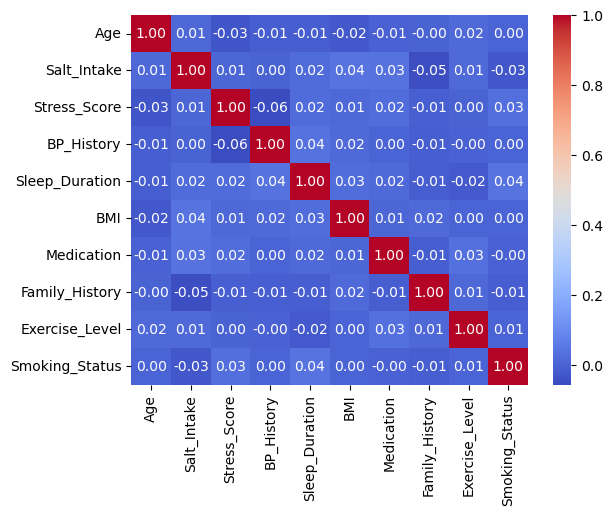

In [346]:
num_col=["Age","Salt_Intake","Stress_Score","BP_History","Sleep_Duration","BMI","Medication","Family_History","Exercise_Level","Smoking_Status"]
corrr_matrix=df[num_col].corr()
sns.heatmap(corrr_matrix,annot=True,fmt=".2f",cmap="coolwarm")
plt.show()

In [347]:
# Top 5 most correlated features with respect to Has_Hypertension
corr_matrix = df.corr(numeric_only=True) 
target_corr = corr_matrix['Has_Hypertension'].drop('Has_Hypertension')
top5 = target_corr.abs().sort_values(ascending=False).head(5)
print(top5)

Age               0.210677
Stress_Score      0.186910
BMI               0.145093
Sleep_Duration    0.119561
Salt_Intake       0.114415
Name: Has_Hypertension, dtype: float64


### Countplot of each columns

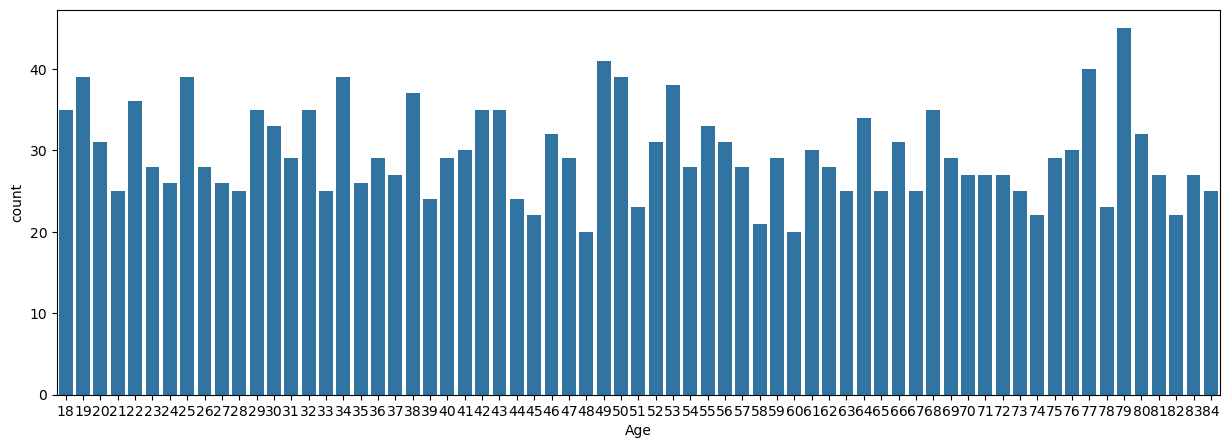

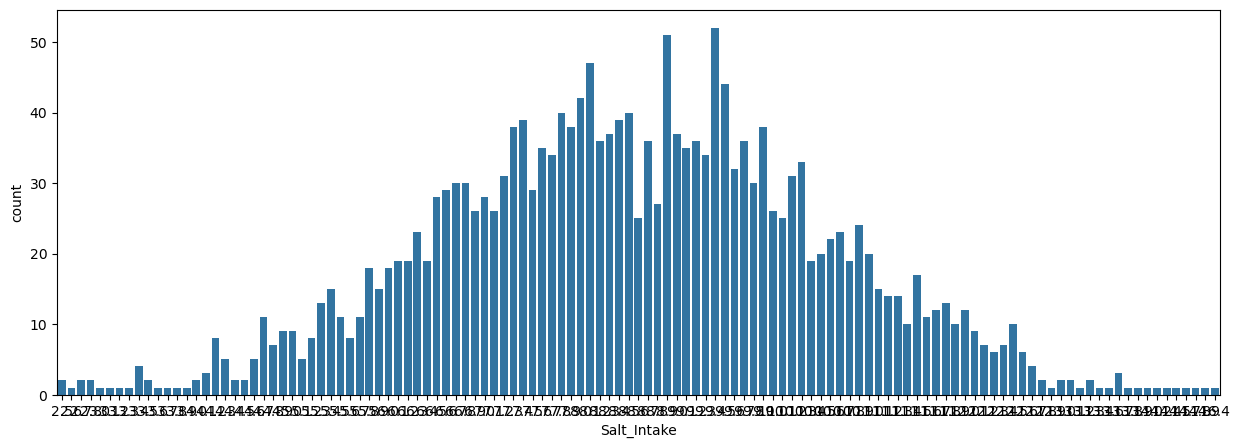

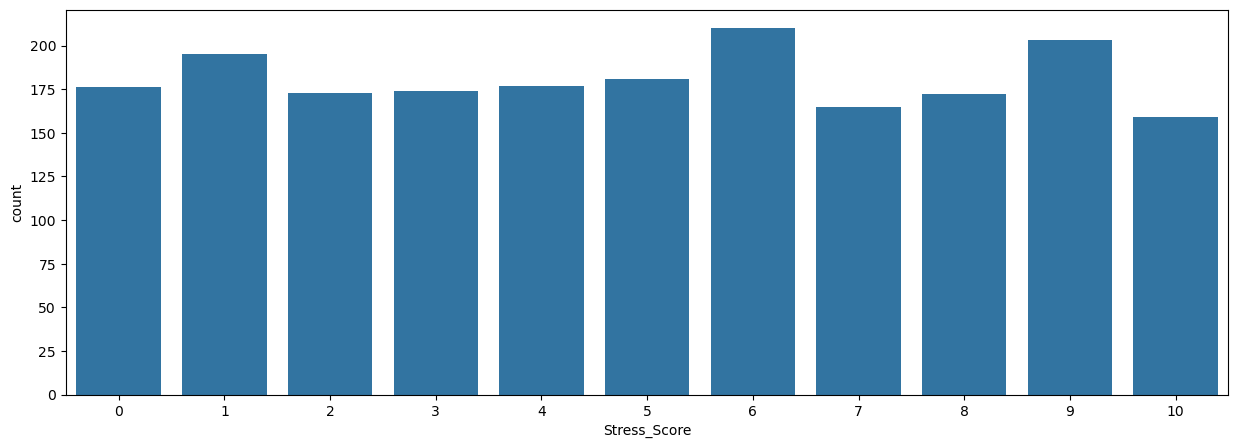

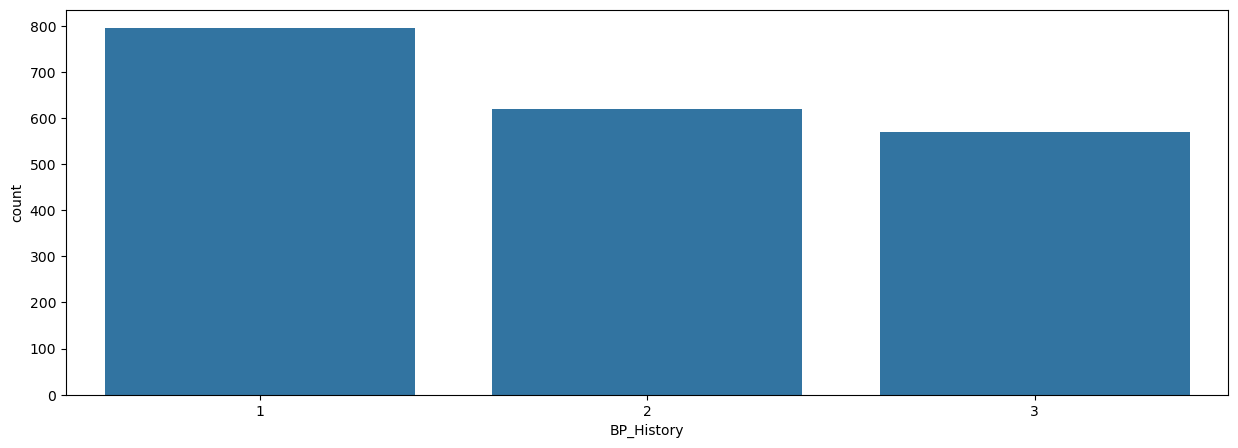

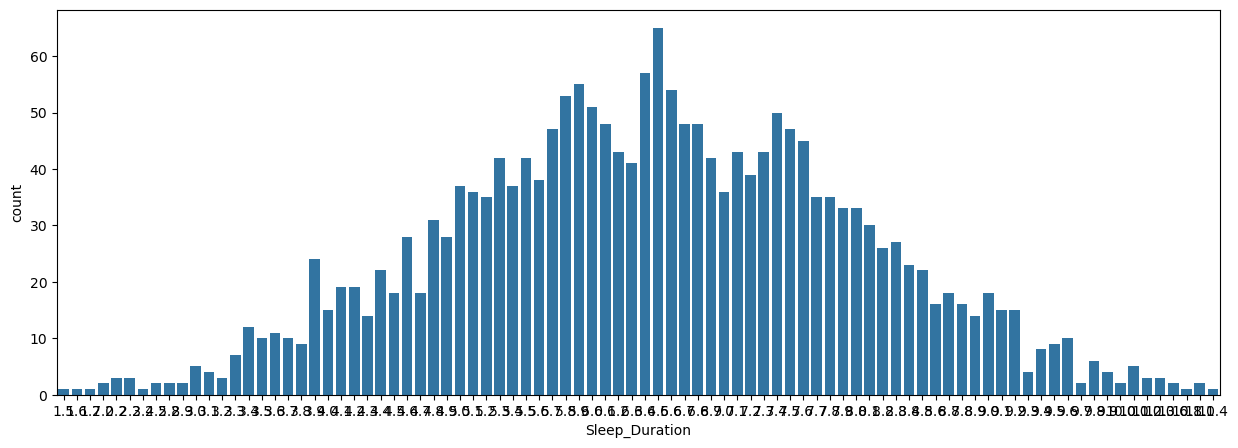

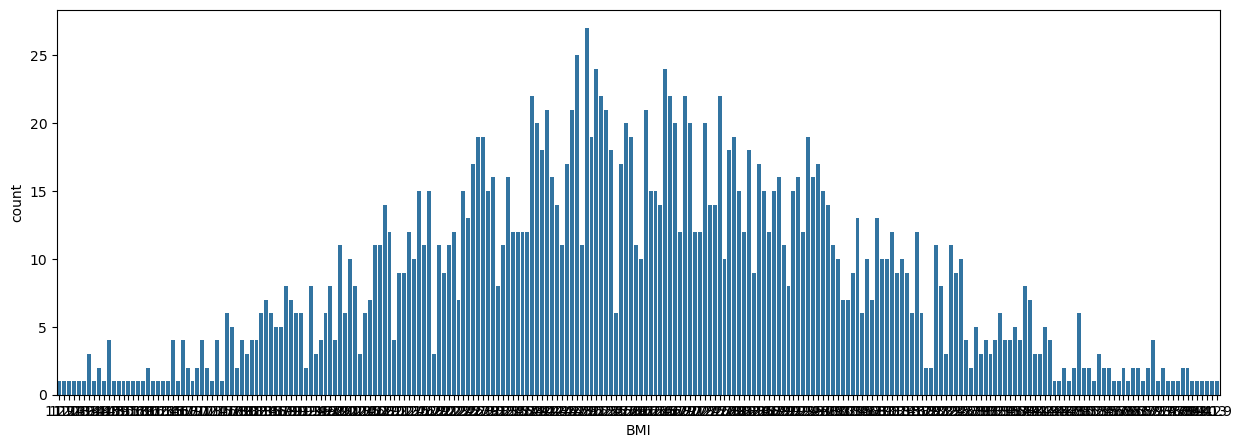

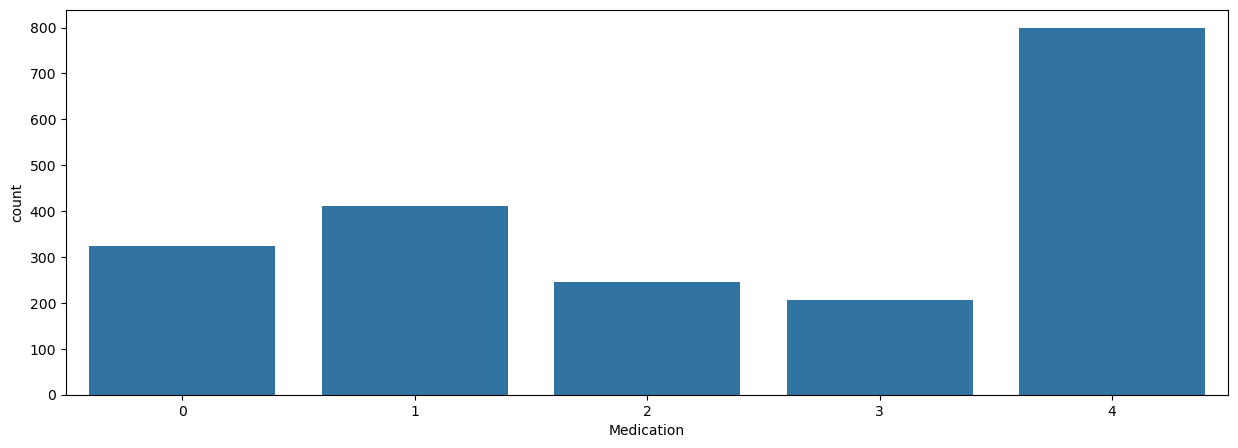

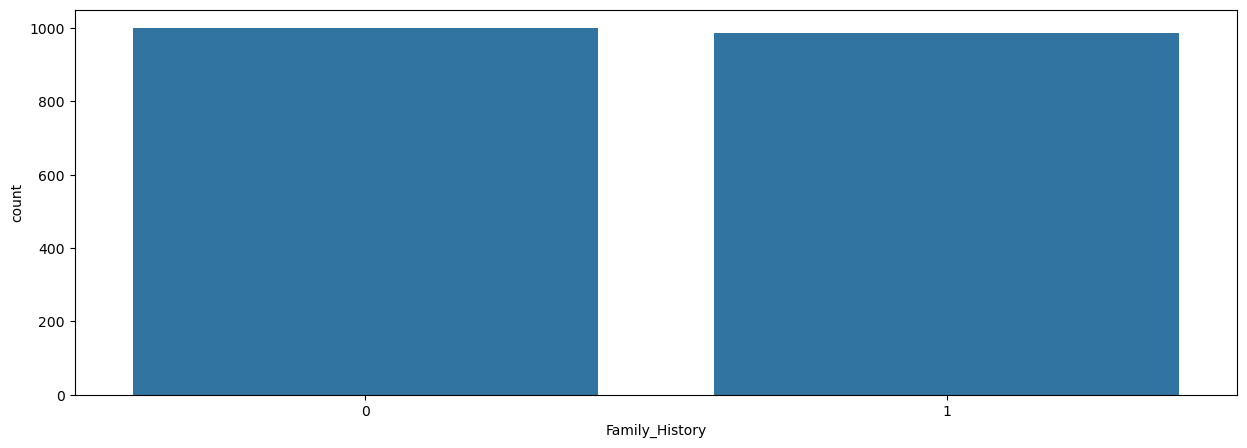

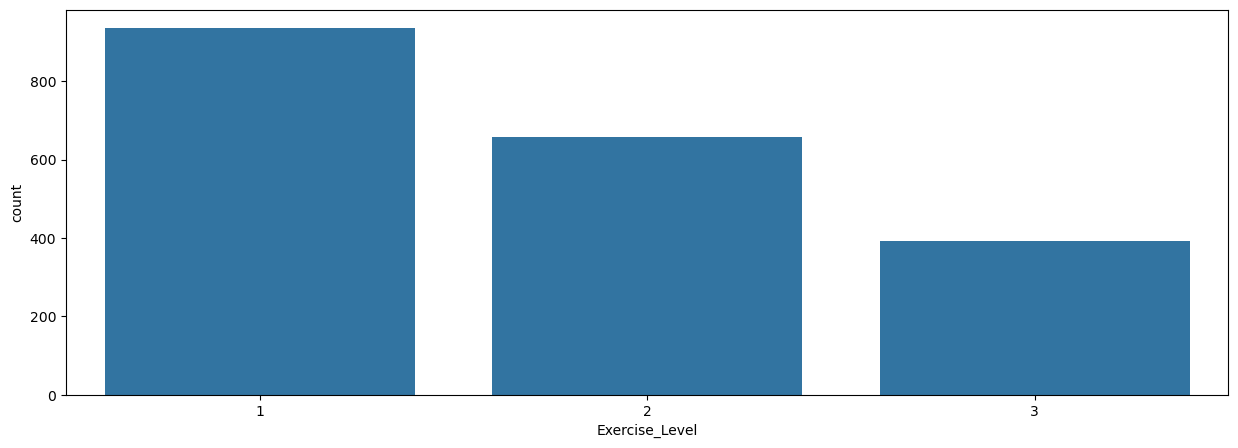

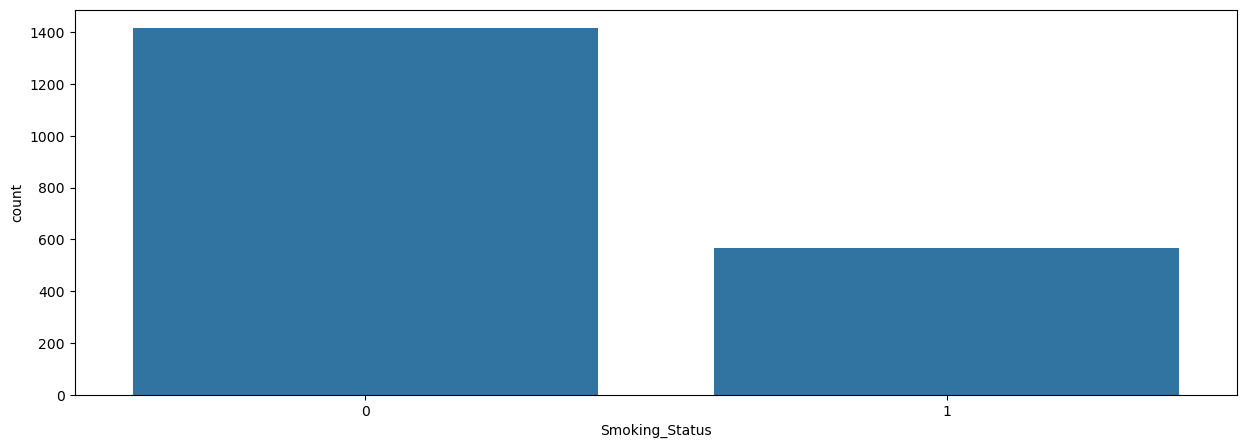

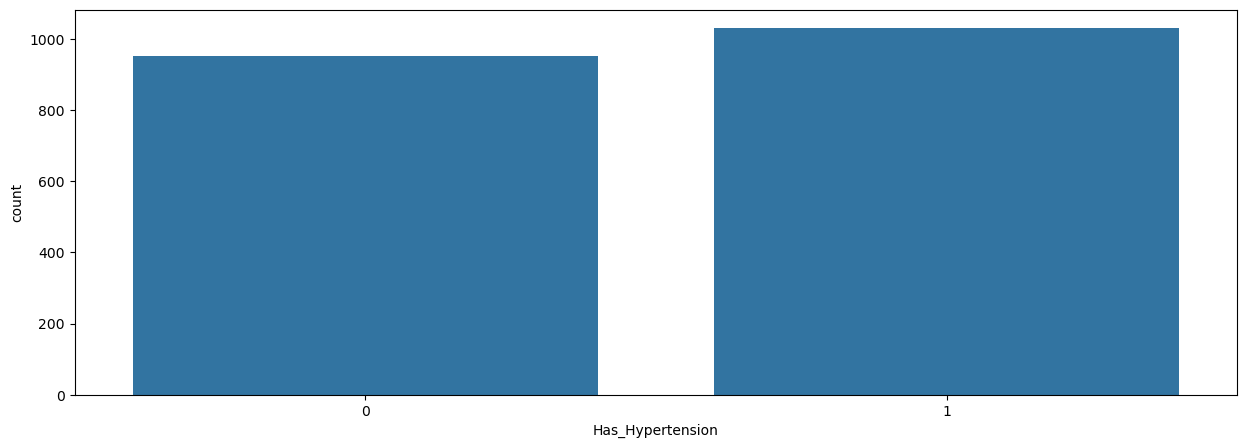

In [348]:
col=df.columns
for i in col:
    plt.figure(figsize=(15,5))
    sns.countplot(x=df[i],data=df)
    plt.show()

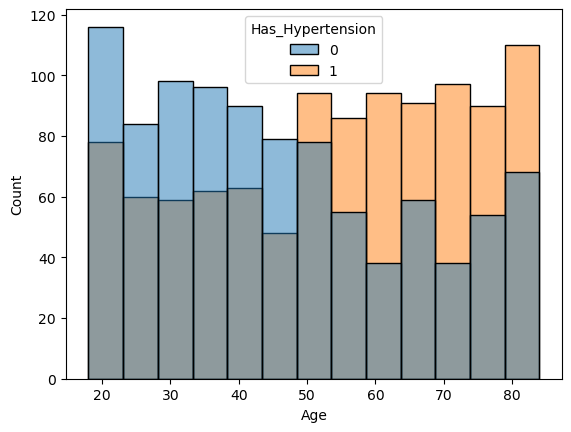

In [349]:
# Checking which age group has more Hypertension
sns.histplot(data=df,x=df["Age"],hue=df["Has_Hypertension"])
plt.show()

In [350]:
# Seperating the target column
X=df.drop(columns=["Has_Hypertension"])
y=df["Has_Hypertension"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, stratify=y, random_state=42)

# Decision Tree Model

Accuracy_score: 0.964735516372796 

Cross-Validated Accuracy (5-Fold): 0.9617128463476071 



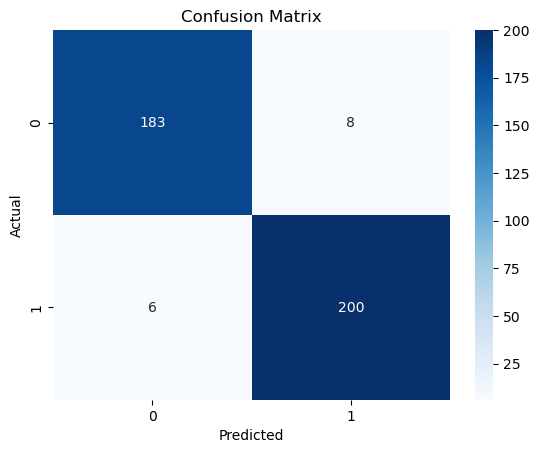

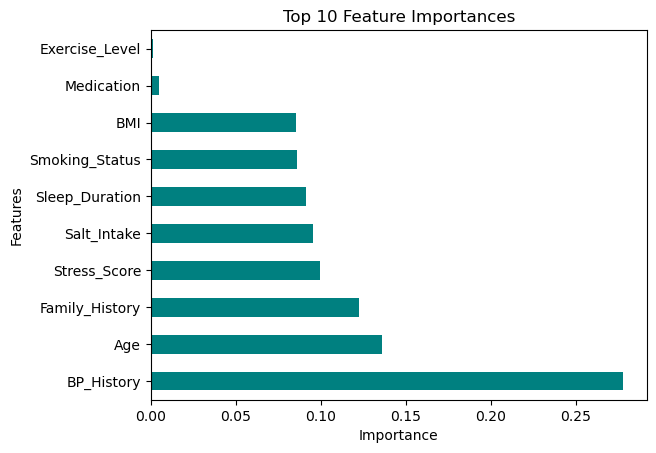

In [351]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train)
predictions=dt_model.predict(X_test)
score=accuracy_score(y_test,predictions)

# Accuracy Score
print("Accuracy_score:",score,"\n")

# Cross-Validation Score
cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

# Feature Importance Plot
feat_importances = pd.Series(dt_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [352]:
print("Clssification Report:\n\n",classification_report(y_test,predictions))

Clssification Report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.96       191
           1       0.96      0.97      0.97       206

    accuracy                           0.96       397
   macro avg       0.96      0.96      0.96       397
weighted avg       0.96      0.96      0.96       397



# K-Nearest Neighbors (KNN)	Model

Accuracy_score: 0.8438287153652393 

Cross-Validated Accuracy (5-Fold): 0.6856423173803526 



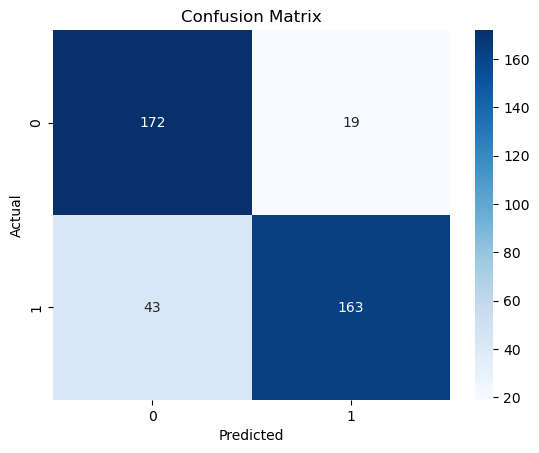

In [353]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=5)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model.fit(X_train_scaled,y_train)
predictions=knn_model.predict(X_test_scaled)
score=accuracy_score(y_test,predictions)

# Accuracy Score
print("Accuracy_score:",score,"\n")

# Cross-Validation Score
cv_scores = cross_val_score(knn_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

In [354]:
print("Classification Report:\n\n",classification_report(y_test,predictions))

Classification Report:

               precision    recall  f1-score   support

           0       0.80      0.90      0.85       191
           1       0.90      0.79      0.84       206

    accuracy                           0.84       397
   macro avg       0.85      0.85      0.84       397
weighted avg       0.85      0.84      0.84       397



# Naive Bayes Model

In [355]:
from sklearn.naive_bayes import GaussianNB

Accuracy_score: 0.8488664987405542 

Cross-Validated Accuracy (5-Fold): 0.854911838790932 



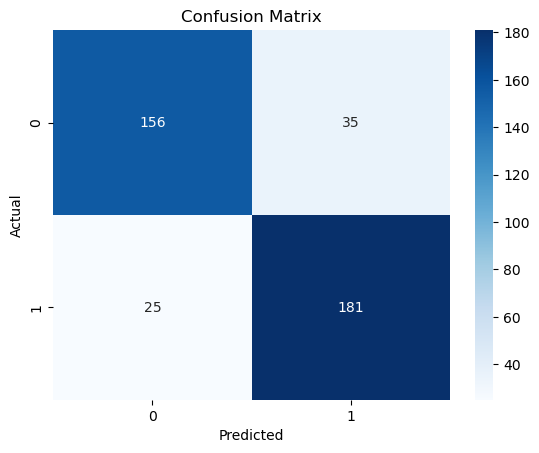

In [356]:
nb_model=GaussianNB()
nb_model.fit(X_train,y_train)
predictions=nb_model.predict(X_test)
score=accuracy_score(y_test,predictions)

# Accuracy Score
print("Accuracy_score:",score,"\n")

# Cross-Validation Score
cv_scores = cross_val_score(nb_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

In [357]:
print("Classification Report:\n\n",classification_report(y_test,predictions))

Classification Report:

               precision    recall  f1-score   support

           0       0.86      0.82      0.84       191
           1       0.84      0.88      0.86       206

    accuracy                           0.85       397
   macro avg       0.85      0.85      0.85       397
weighted avg       0.85      0.85      0.85       397



# Logistic Regression Model

In [358]:
from sklearn.linear_model import LogisticRegression

Accuracy_score: 0.8236775818639799 

Cross-Validated Accuracy (5-Fold): 0.8337531486146096 



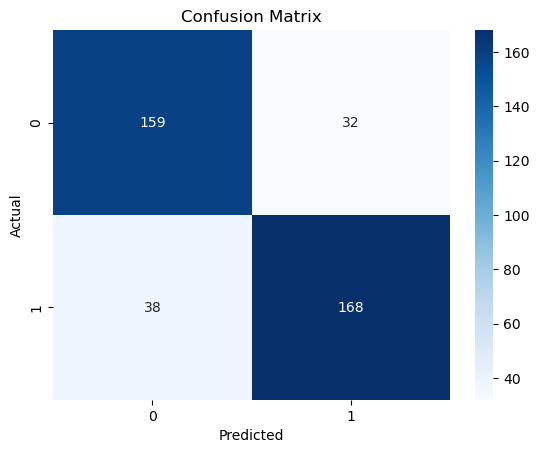

In [359]:
lg_model = LogisticRegression(max_iter=1000)

# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lg_model.fit(X_train_scaled,y_train)
predictions=lg_model.predict(X_test_scaled)
score=accuracy_score(y_test,predictions)

# Accuracy Score
print("Accuracy_score:",score,"\n")

# Cross-Validation Score
cv_scores = cross_val_score(lg_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

In [360]:
print("Classification Report:\n\n",classification_report(y_test,predictions))

Classification Report:

               precision    recall  f1-score   support

           0       0.81      0.83      0.82       191
           1       0.84      0.82      0.83       206

    accuracy                           0.82       397
   macro avg       0.82      0.82      0.82       397
weighted avg       0.82      0.82      0.82       397



# Support Vector Machine (SVM) Model

In [361]:
from sklearn.svm import SVC

Accuracy_score: 0.889168765743073 

Cross-Validated Accuracy (5-Fold): 0.6977329974811083 



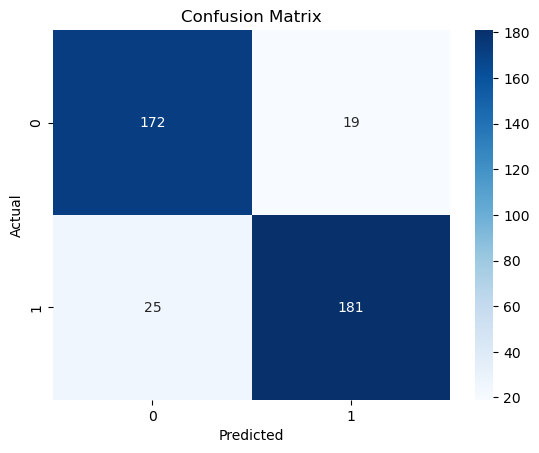

In [362]:
svm_model=SVC()

# Scaling the data
scaler = StandardScaler()
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model.fit(X_train_scaled, y_train)
predictions=svm_model.predict(X_test_scaled)
score=accuracy_score(y_test,predictions)

# Accuracy Score
print("Accuracy_score:",score,"\n")

# Cross-Validation Score
cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

In [363]:
print("Classification Report:\n\n",classification_report(y_test,predictions))

Classification Report:

               precision    recall  f1-score   support

           0       0.87      0.90      0.89       191
           1       0.91      0.88      0.89       206

    accuracy                           0.89       397
   macro avg       0.89      0.89      0.89       397
weighted avg       0.89      0.89      0.89       397



# Random Forest Model

In [364]:
from sklearn.ensemble import RandomForestClassifier

Accuracy Score: 0.9672544080604534 

Cross-Validated Accuracy (5-Fold): 0.9727959697732999 



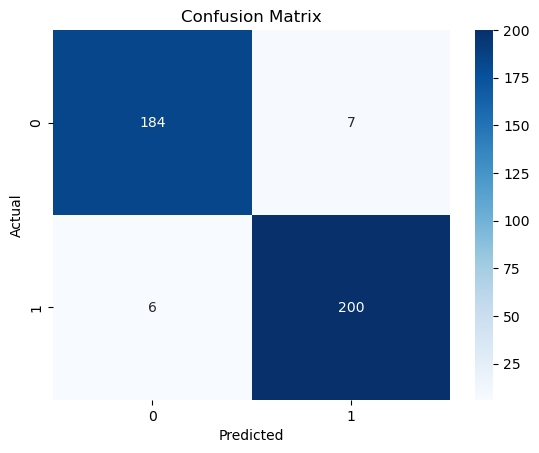

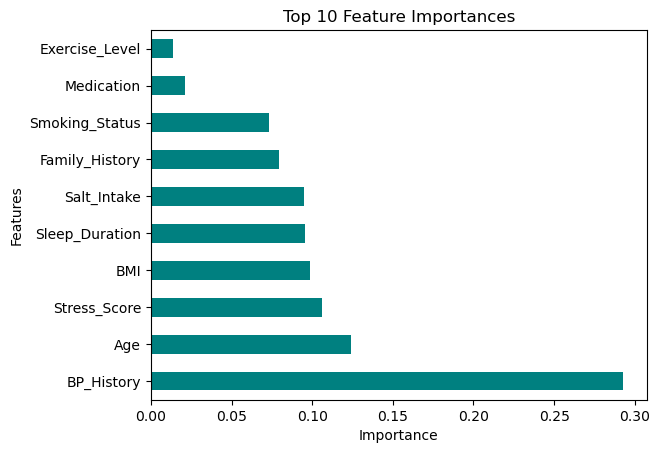

In [365]:
rf_model=RandomForestClassifier()

# Initialize and Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
predictions = rf_model.predict(X_test)

# Accuracy Score
print("Accuracy Score:", accuracy_score(y_test, predictions),"\n")

# Cross-Validation Score
cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross-Validated Accuracy (5-Fold):", cv_scores.mean(),"\n")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\n")

# Feature Importance Plot
feat_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', color='teal')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

In [366]:
print("Classification Report:\n\n", classification_report(y_test, predictions))

Classification Report:

               precision    recall  f1-score   support

           0       0.97      0.96      0.97       191
           1       0.97      0.97      0.97       206

    accuracy                           0.97       397
   macro avg       0.97      0.97      0.97       397
weighted avg       0.97      0.97      0.97       397



### Model Comparison

                 Model  Test Accuracy  CV Accuracy
0        Decision Tree          0.962        0.962
1                  KNN          0.843        0.685
2          Naive Bayes          0.848        0.854
3  Logistic Regression          0.823        0.833
4                  SVM          0.889        0.697
5        Random Forest          0.967        0.972 



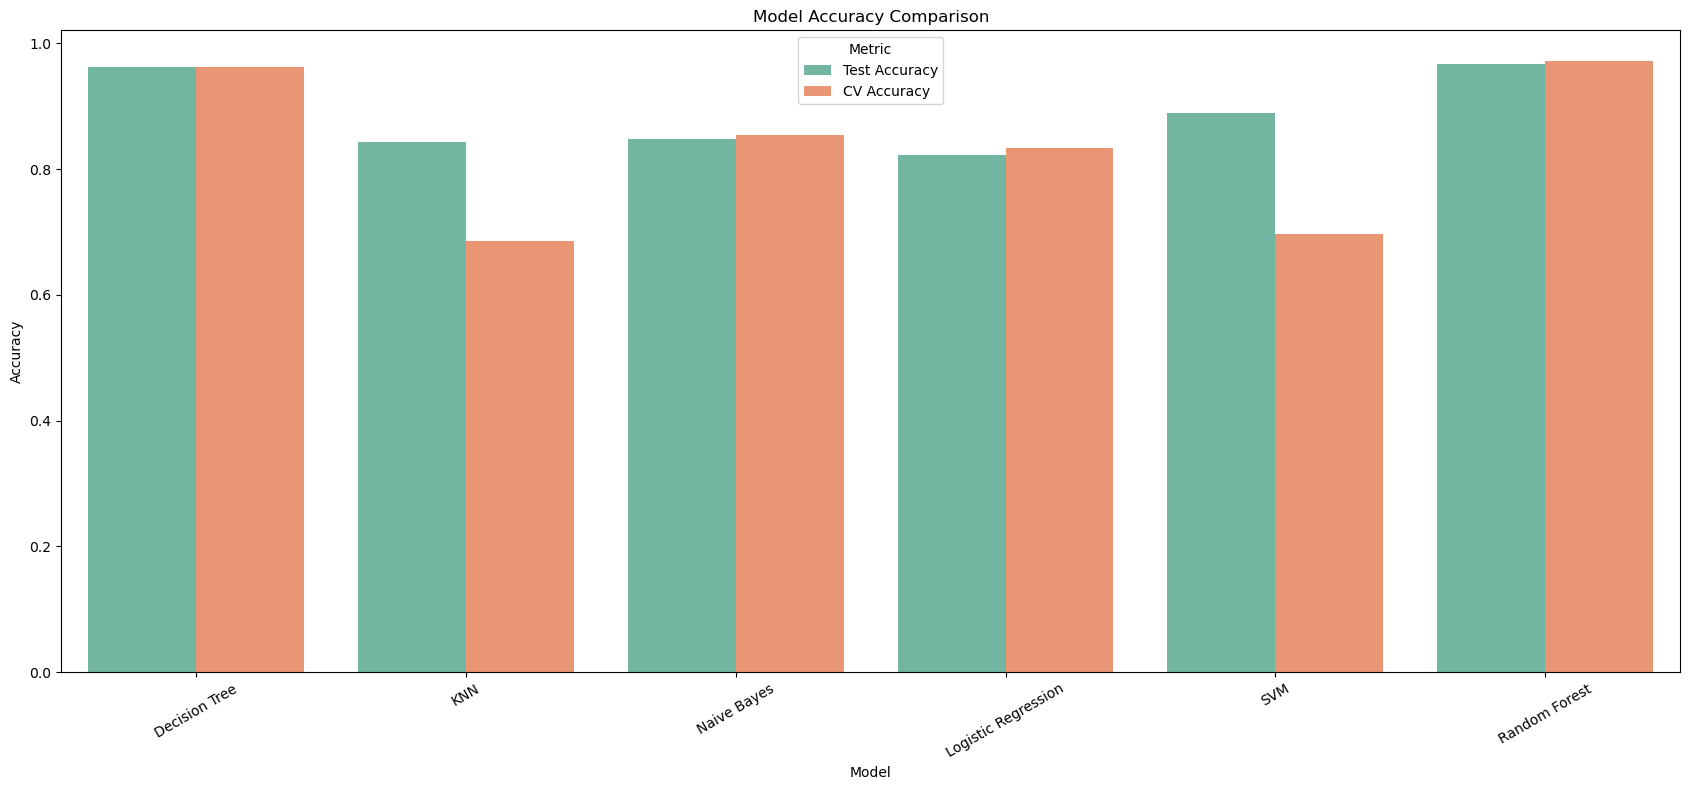

In [372]:
model_results = {
    "Model": ["Decision Tree", "KNN", "Naive Bayes", "Logistic Regression", "SVM", "Random Forest"],
    "Test Accuracy": [0.962, 0.843, 0.848, 0.823, 0.889, 0.967],
    "CV Accuracy": [0.962, 0.685, 0.854, 0.833, 0.697, 0.972]
}

results_df = pd.DataFrame(model_results)
print(results_df,"\n")


# Melt into long format
df_long = results_df.melt(id_vars="Model", var_name="Metric", value_name="Accuracy")

# Barplot
plt.figure(figsize=(17, 8))
sns.barplot(data=df_long, x="Model", y="Accuracy", hue="Metric", palette="Set2")
plt.xticks(rotation=30)
plt.title("Model Accuracy Comparison")
plt.tight_layout()
plt.show()